In [50]:
import os
import re
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from src.utils.tools import plot_metrics

# Review and list top results

In [57]:
# Plot metrics using all the files in the results folder

# results_folder = "./results/"
results_folder = "/l/users/roberto.guillen/RL/results/"

scores = []
for file in os.listdir(results_folder):
    
    #print(file)
    
    try:

        with open(results_folder + file, 'rb') as f:

            metrics = pickle.load(f, errors='ignore')
            # Extract metrics
            train_price = np.array(metrics['train']['agent']['price_metric']).min()
            train_emission = np.array(metrics['train']['agent']['emission_metric']).min()
            eval_price = np.array(metrics['eval']['agent']['price_metric']).min()
            eval_emission = np.array(metrics['eval']['agent']['emission_metric']).min()
            # Extract file name numbers
            row = list(re.search(r"d_a2c_mg_alr_(.*)_clr_(.*)_cnn_(.*)_ann_(.*).pkl",file).groups())
            row += [train_price, train_emission, eval_price, eval_emission]
            scores.append(row)
            # plot_metrics(results)

    except Exception as e:

        print("Error loading file")
        print(e)
        os.remove(results_folder + file)
        continue
scores = np.array(scores)
col_names = ['ActorLr','CriticLr','CriticNN','ActorNN','train_price', 'train_emission', 'eval_price', 'eval_emission']
df = pd.DataFrame(scores, columns=col_names)
# Convert numeric columns to float, except nn

df[col_names] = df[['ActorLr','CriticLr','train_price', 'train_emission', 'eval_price', 'eval_emission']].astype(float)


In [60]:
df['ActorLr'].unique(), df['ActorNN'].unique(), df['CriticLr'].unique(), df['CriticNN'].unique()

(array([0.00066129, 0.00062054, 0.00035039, 0.00058688, 0.00077404,
        0.00573342, 0.00011728, 0.00441034, 0.00438589]),
 array([256., 512.,  32.,  64., 128.]),
 array([0.00037559, 0.00038298, 0.00076431, 0.00215791, 0.00019099,
        0.00646185, 0.00019428, 0.0006006 , 0.00020008]),
 array([ 32., 512., 256., 128.,  64.]))

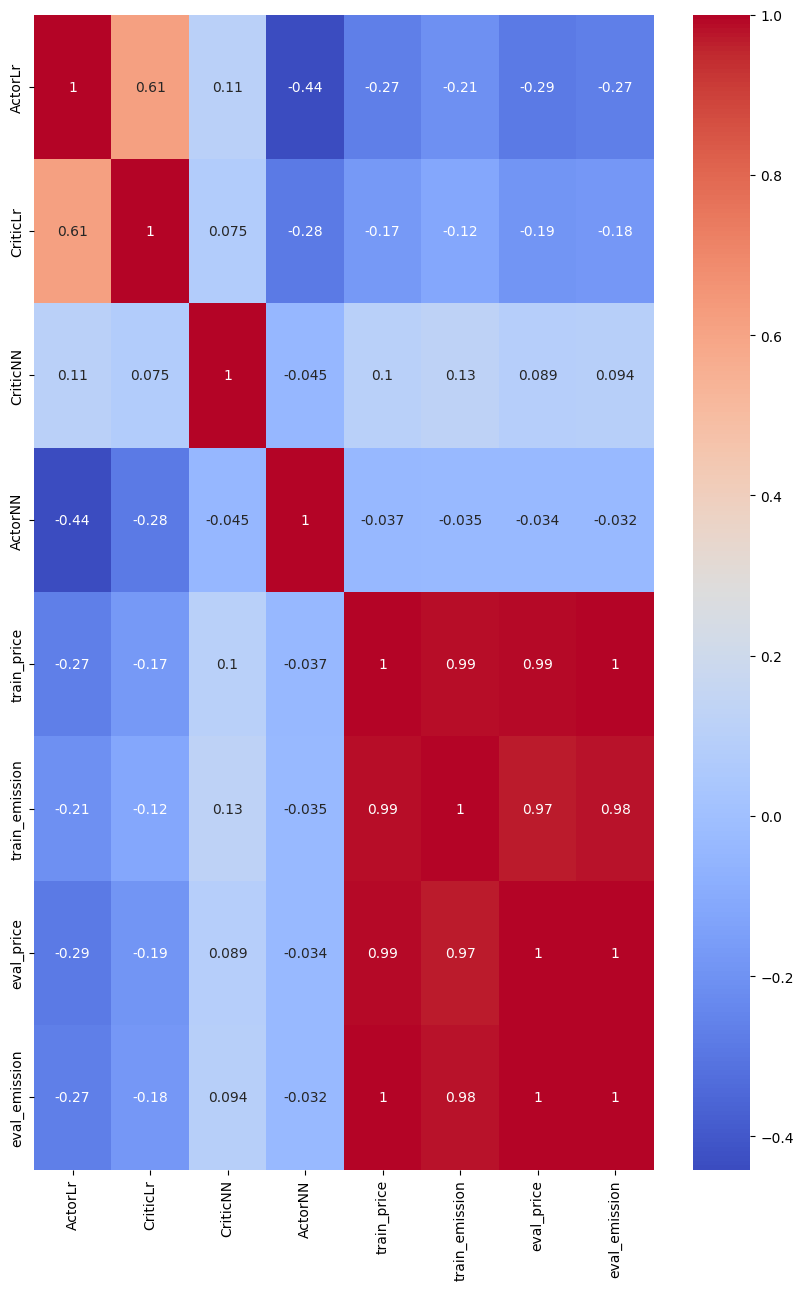

In [58]:
corr =df.corr(numeric_only=False)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

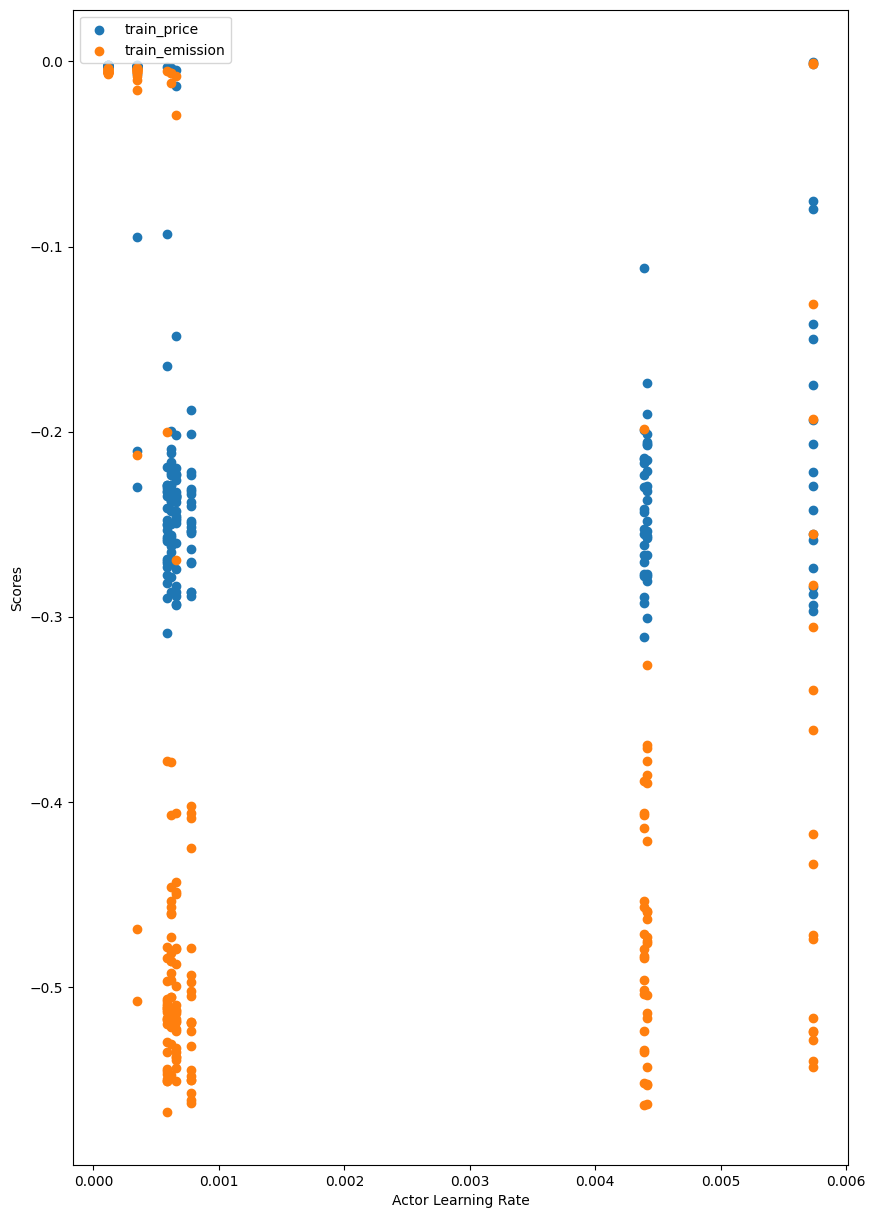

In [61]:
fig, ax = plt.subplots()
# for i in range(1, len(data)):
    # ax.scatter(data[0], data[i], label=f'Column {i}')

x = df['ActorLr']

y = df[col_names[4]]
ax.scatter(x, y, label=df.columns[4])
y = df[col_names[5]]
ax.scatter(x, y, label=df.columns[5])

ax.legend()

ax.set_xlabel('Actor Learning Rate')
ax.set_ylabel('Scores')
plt.show()

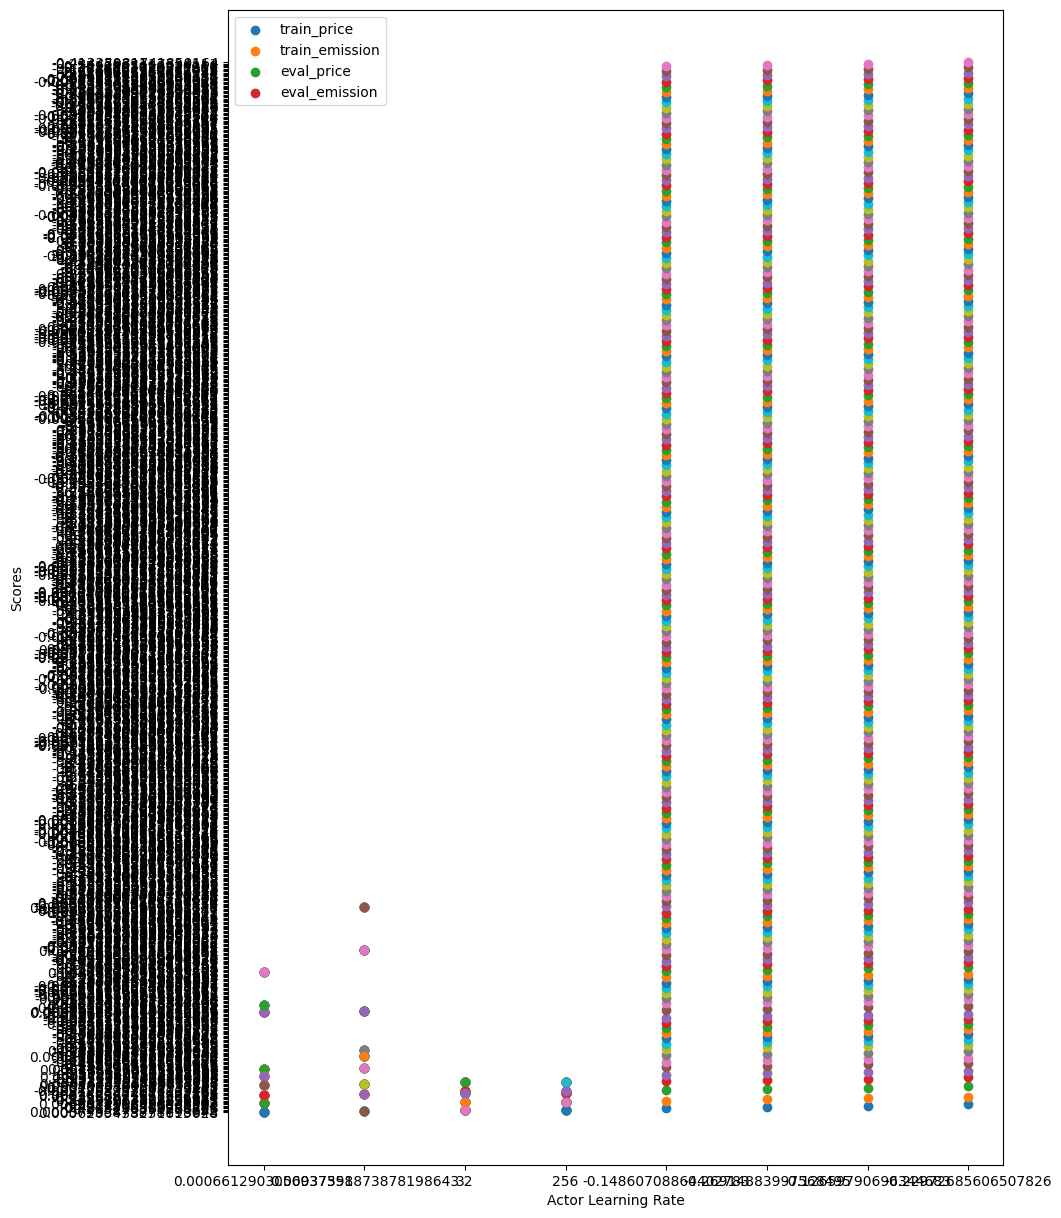

In [25]:
# Extract the first column and last four columns
# x = scores[:,0]
# y = scores[:,4:]
data = scores
# Plot the graph
# for i in range(y.shape[1]):
# plt.plot(x, y[:,0])
fig, ax = plt.subplots()
for i in range(1, len(data)):
    ax.scatter(data[0], data[i], label=f'Column {i}')

ax.set_xlabel('Actor Learning Rate')
ax.set_ylabel('Scores')
ax.legend(['train_price', 'train_emission', 'eval_price', 'eval_emission'])
plt.show()


# Review Images 

d_a2c_mg_alr_0.0057334168227337464_clr_0.002157908861464329_cnn_128_ann_32.pkl


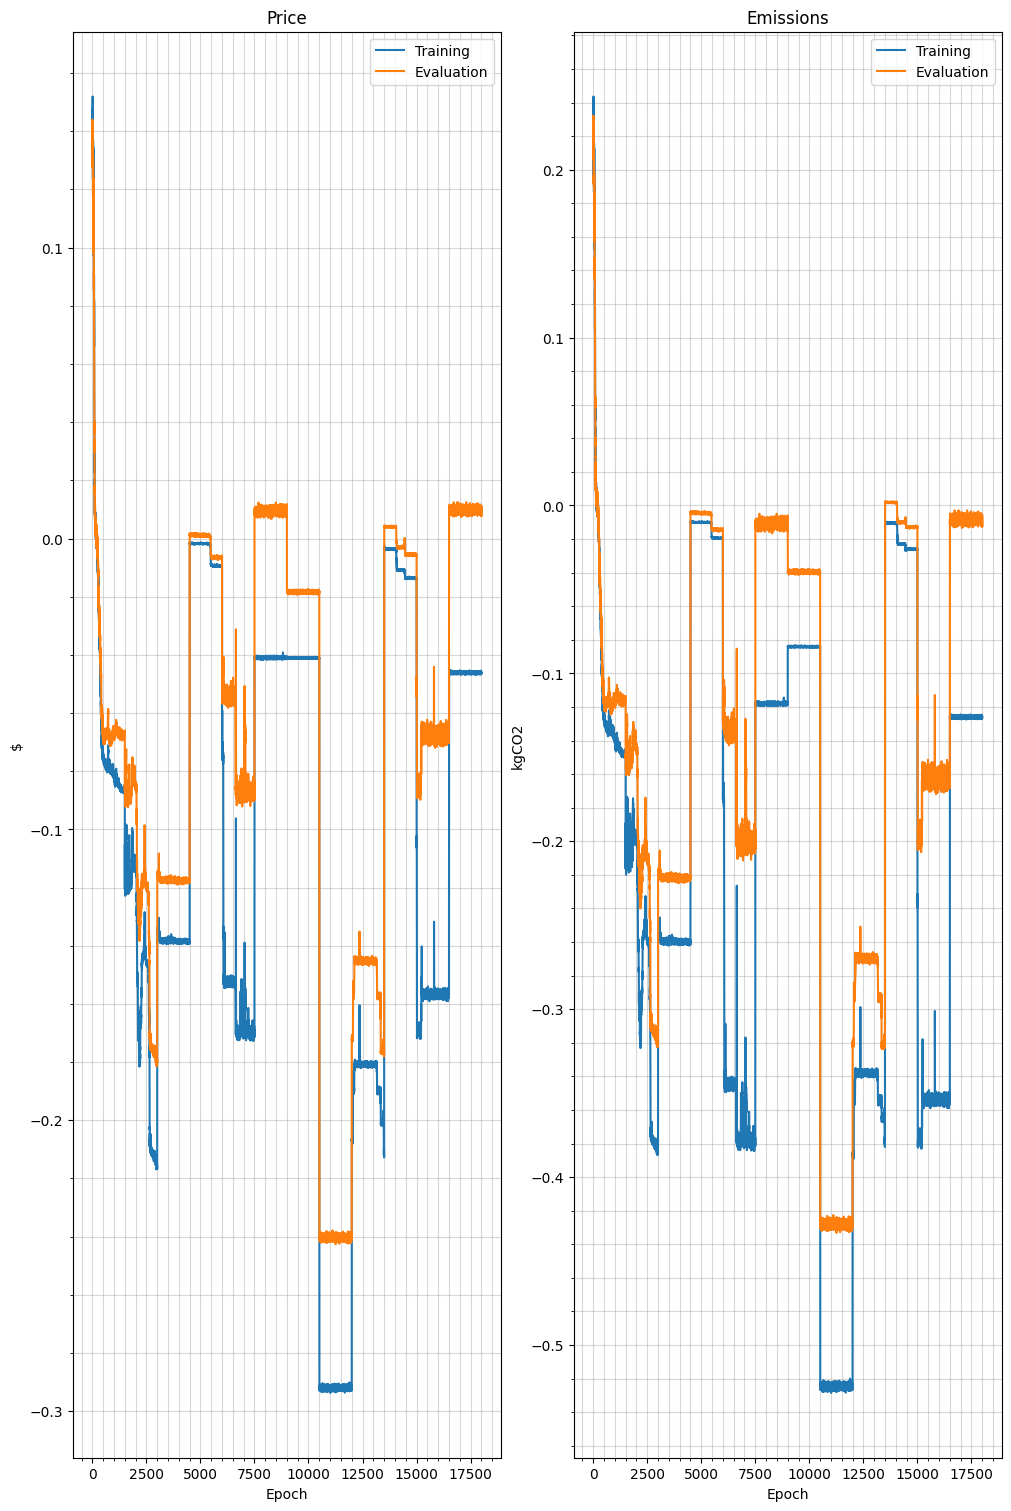

d_a2c_mg_alr_0.0057334168227337464_clr_0.006461851177969943_cnn_256_ann_128.pkl


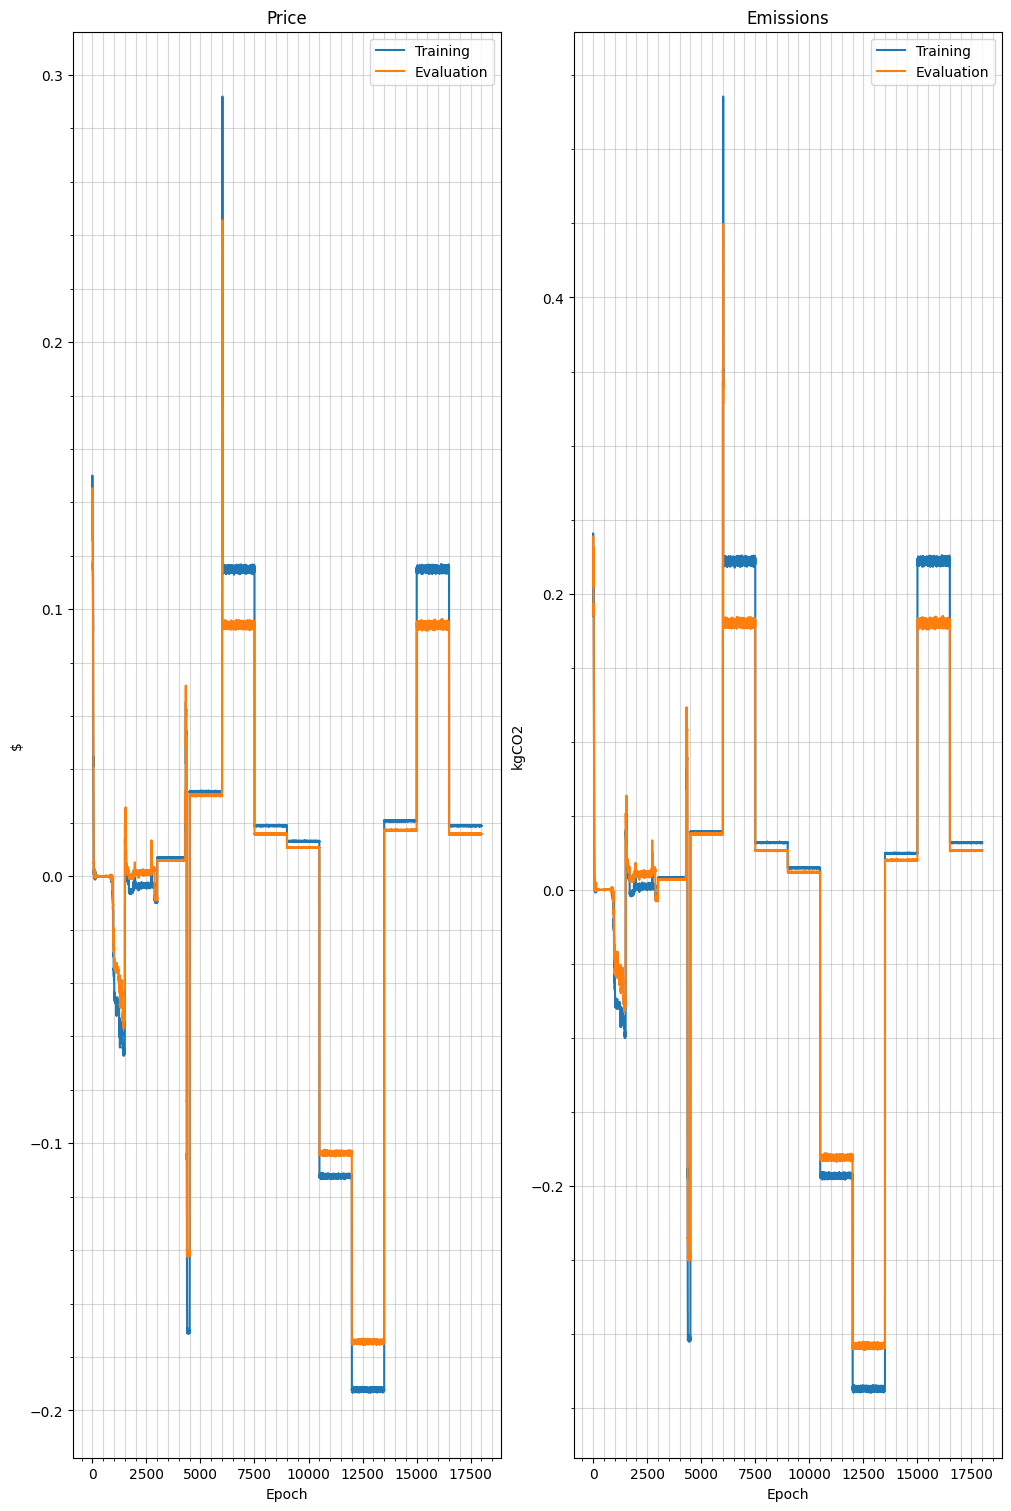

d_a2c_mg_alr_0.0057334168227337464_clr_0.006461851177969943_cnn_512_ann_128.pkl


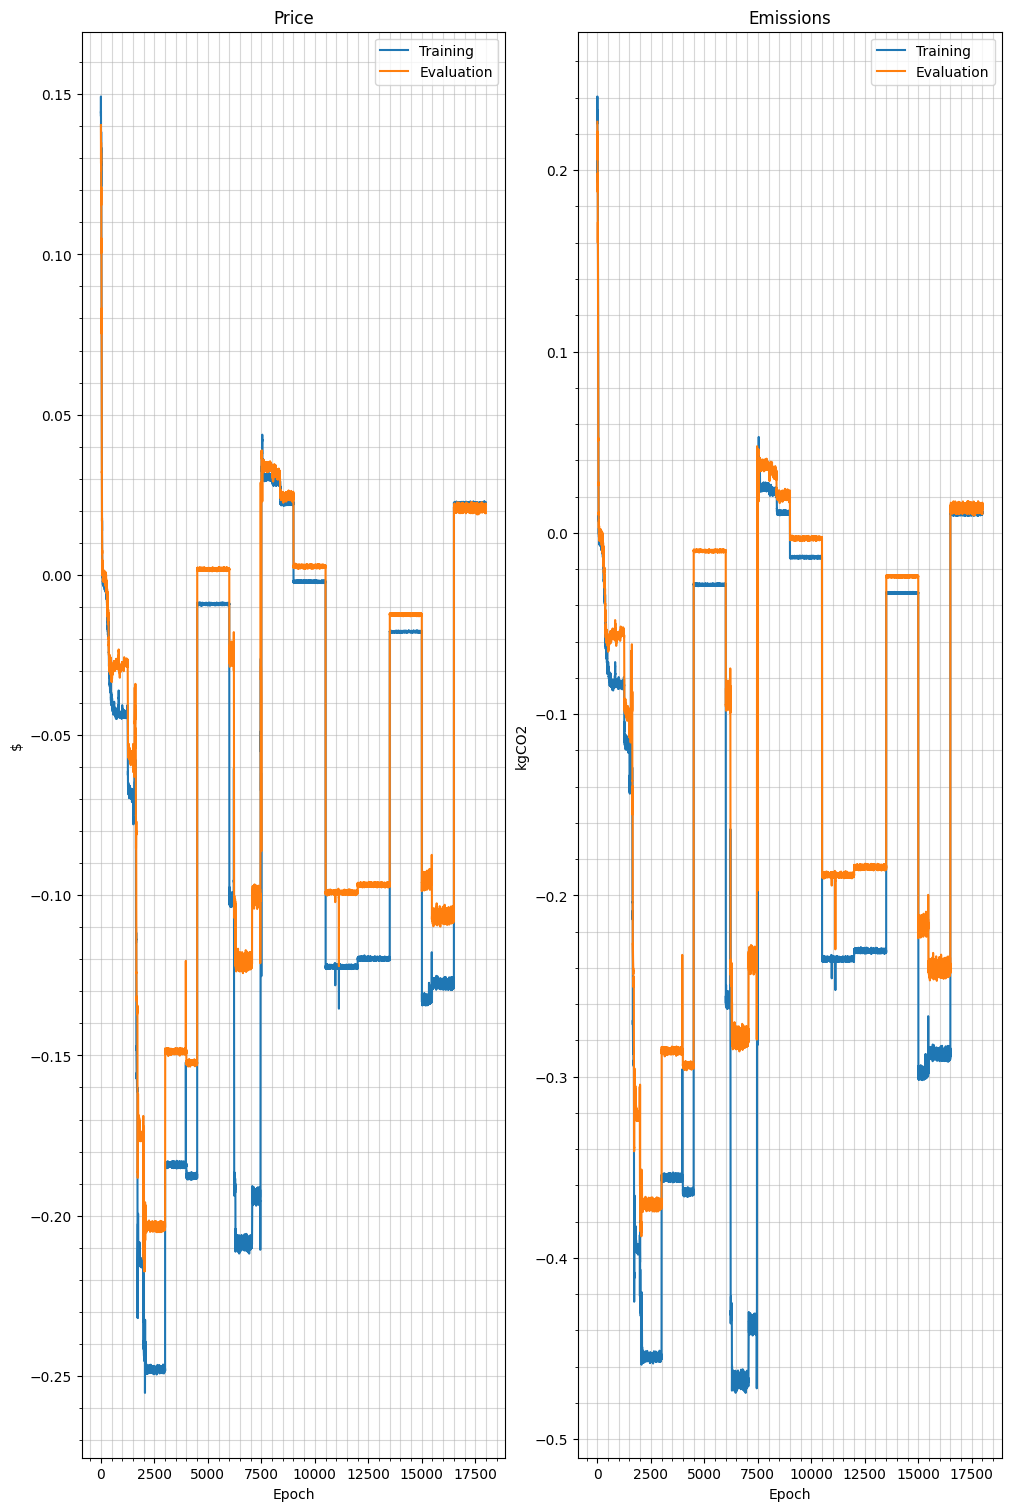

d_a2c_mg_alr_0.004410337865354689_clr_0.002157908861464329_cnn_256_ann_64.pkl


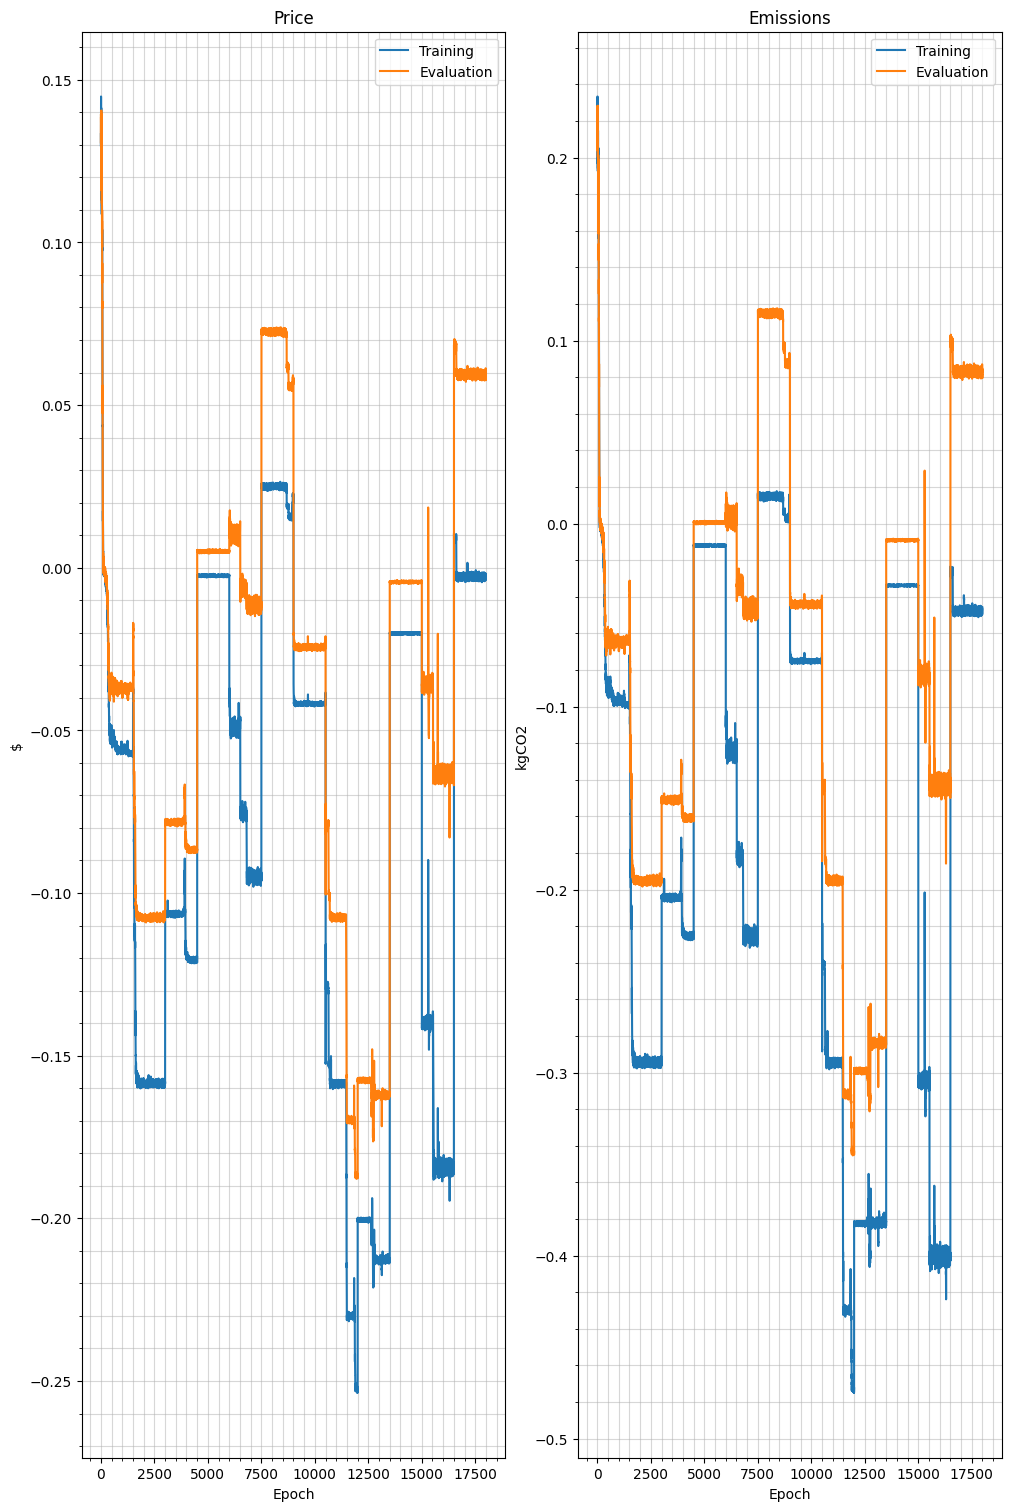

d_a2c_mg_alr_0.0009312922732834324_clr_0.0024692137105333154_cnn_128_ann_64.pkl


In [2]:
# Plot metrics using all the files in the results folder

# results_folder = "./results/"
results_folder = "/l/users/roberto.guillen/RL/results/"

for file in os.listdir(results_folder):
    
    print(file)
    
    try:

        with open(results_folder + file, 'rb') as f:

            results = pickle.load(f, errors='ignore')
            plot_metrics(results)

    except Exception as e:

        print("Error loading file")
        print(e)
        os.remove(results_folder + file)
        continue
